## Goal: 
- Create word vectors from a game of thrones dataset to see semantic similarity

## Import our dependinces

In [ ]:
# for word encoding
import codecs
# regex
import glob
# Concurrency
import multiprocessing
# dealing with the operating system
import os
# pretty printing, human readable
import pprint
# more regularexpression
import re
# natural language toolkit
import nltk
# word 2 vec
import gensim.models.word2vec as w2v
# dimensionality reduction - Video - visualize a dataset easily
import sklearn.manifold
# math
import numpy as np
# plotting
import matplotlib.pyplot as plt
# parse pandas as pd
import pandas as pd
# visualization
import seaborn as sns
# logging
import logging

In [ ]:
%pylab inline

### Set up logging

In [ ]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
# step 1 process our data
# clean our data
nltk.download('punkt') # pretrained tokenizer "take a peice of text and split into text" this does sentances
nltk.download('stopwords') # words like and, the an, a, of. We want to remove these

### Prepare Corpus
#### Load books from files

In [ ]:
# get the book names, matching txt file
book_filenames = sorted(glob.glob(".\data\*.txt"))
print('Found Books: ')
book_filenames # print out the file names

In [34]:
corpus_raw = u""
for book_filename in book_filenames:
    print("Reading '{0}'...".format(book_filename))
    with codecs.open(book_filename, "r", "utf-8") as book_file:
        corpus_raw += book_file.read()
    print("Corpus is now {0} characters long".format(len(corpus_raw)))
    print()

Reading '.\data\got1.txt'...
Corpus is now 1770659 characters long

Reading '.\data\got2.txt'...
Corpus is now 4071041 characters long

Reading '.\data\got3.txt'...
Corpus is now 6391405 characters long

Reading '.\data\got4.txt'...
Corpus is now 8107945 characters long

Reading '.\data\got5.txt'...
Corpus is now 9719485 characters long



### Split the corpus into sentences

In [26]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [35]:
raw_sentences = tokenizer.tokenize(corpus_raw)

In [36]:
#convert into a list of words
#remove unnnecessary,, split into words, no hyphens
#list of words
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    return words

In [37]:
#sentence where each word is tokenized
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [38]:
print(raw_sentences[5])
print(sentence_to_wordlist(raw_sentences[5]))

Heraldic crest by Virginia Norey.
['Heraldic', 'crest', 'by', 'Virginia', 'Norey']


In [39]:
token_count = sum([len(sentence) for sentence in sentences])
print("The book corpus contains {0:,} tokens".format(token_count))

The book corpus contains 1,818,103 tokens


## Train Word2Vec
### Below are the hyperparms

word vectors and word embedding is the same thing

In [46]:
#ONCE we have vectors
#step 3 - build model
#3 main tasks that vectors help with
#DISTANCE, SIMILARITY, RANKING

# Dimensionality of the resulting word vectors.
#more dimensions, more computationally expensive to train
#but also more accurate
#more dimensions = more generalized
num_features = 300
# Minimum word count threshold.
min_word_count = 3

# Number of threads to run in parallel.
#more workers, faster we train
num_workers = multiprocessing.cpu_count()

# Context window length.
context_size = 7

# Downsample setting for frequent words.
#0 - 1e-5 is good for this
downsampling = 1e-3

# Seed for the RNG, to make the results reproducible.
#random number generator
#deterministic, good for debugging
seed = 1


In [48]:
thrones2vec = w2v.Word2Vec(
        sg=1,
        seed=seed,
        workers=num_workers,
        size=num_features,
        min_count=min_word_count,
        window=context_size,
        sample=downsampling
)

In [49]:
thrones2vec.build_vocab(sentences)

2017-02-07 00:39:11,566 : INFO : collecting all words and their counts
2017-02-07 00:39:11,569 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-02-07 00:39:11,617 : INFO : PROGRESS: at sentence #10000, processed 140984 words, keeping 10280 word types
2017-02-07 00:39:11,704 : INFO : PROGRESS: at sentence #20000, processed 279730 words, keeping 13558 word types
2017-02-07 00:39:11,777 : INFO : PROGRESS: at sentence #30000, processed 420336 words, keeping 16598 word types
2017-02-07 00:39:11,823 : INFO : PROGRESS: at sentence #40000, processed 556581 words, keeping 18324 word types
2017-02-07 00:39:11,883 : INFO : PROGRESS: at sentence #50000, processed 686247 words, keeping 19714 word types
2017-02-07 00:39:11,950 : INFO : PROGRESS: at sentence #60000, processed 828497 words, keeping 21672 word types
2017-02-07 00:39:11,988 : INFO : PROGRESS: at sentence #70000, processed 973830 words, keeping 23093 word types
2017-02-07 00:39:12,050 : INFO : PROGRESS: at 

In [57]:
print("Word2Vec vocabulary length:", len(thrones2vec.vocab))

2017-02-07 01:04:25,641 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab


Word2Vec vocabulary length: 17277


#### Start training, this might take a minute or two....

In [58]:
thrones2vec.train(sentences)

2017-02-07 01:04:32,657 : INFO : training model with 4 workers on 17277 vocabulary and 300 features, using sg=1 hs=0 sample=0.001 negative=5 window=7
2017-02-07 01:04:32,694 : INFO : expecting 128868 sentences, matching count from corpus used for vocabulary survey
2017-02-07 01:04:33,815 : INFO : PROGRESS: at 2.30% examples, 153452 words/s, in_qsize 7, out_qsize 0
2017-02-07 01:04:34,842 : INFO : PROGRESS: at 5.31% examples, 177840 words/s, in_qsize 7, out_qsize 0
2017-02-07 01:04:35,911 : INFO : PROGRESS: at 8.17% examples, 176540 words/s, in_qsize 7, out_qsize 0
2017-02-07 01:04:36,951 : INFO : PROGRESS: at 10.49% examples, 173251 words/s, in_qsize 8, out_qsize 1
2017-02-07 01:04:37,994 : INFO : PROGRESS: at 13.11% examples, 174275 words/s, in_qsize 8, out_qsize 1
2017-02-07 01:04:39,006 : INFO : PROGRESS: at 15.36% examples, 170689 words/s, in_qsize 8, out_qsize 0
2017-02-07 01:04:40,014 : INFO : PROGRESS: at 17.80% examples, 170282 words/s, in_qsize 6, out_qsize 1
2017-02-07 01:04:

7022179

### Save to file, can be useful later

In [59]:
if not os.path.exists("trained"):
    os.makedirs("trained")

### Compress the word vectors into 2D space and plot them

In [60]:
#my video - how to visualize a dataset easily
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [61]:
all_word_vectors_matrix = thrones2vec.syn0

2017-02-07 01:06:42,436 : WARNING : direct access to syn0 will not be supported in future gensim releases, please use model.wv.syn0


### Train t-SNE, this could take a minute or two...

In [62]:
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

#### Plot the big picture

In [ ]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[thrones2vec.vocab[word].index])
            for word in thrones2vec.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [ ]:
points.head(10)

In [73]:
sns.set_context("poster")

In [ ]:
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

### Zoom in to some interesting places

In [70]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

### People related to kingsguard ended up together

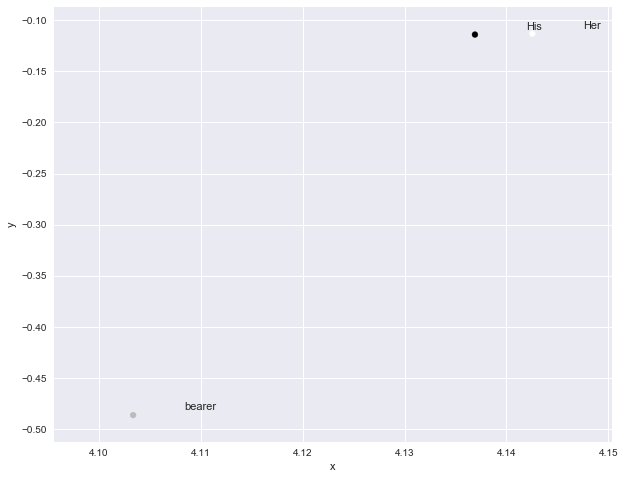

In [71]:
plot_region(x_bounds=(4.0, 4.2), y_bounds=(-0.5, -0.1))

### Food products are grouped nicely as well. Aerys (The Mad King) being close to "roasted" also looks sadly correct

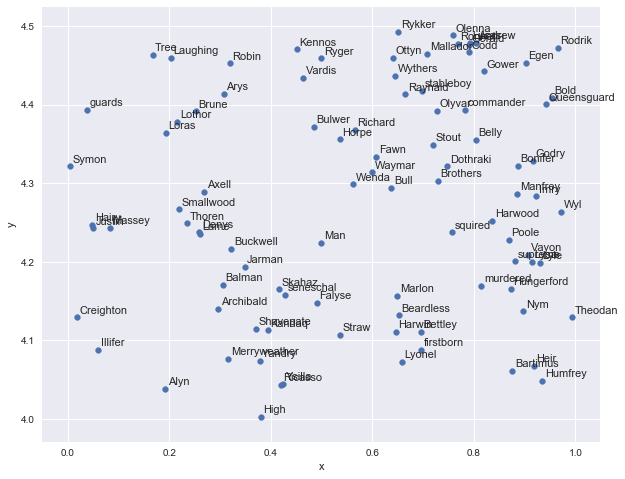

In [72]:
plot_region(x_bounds=(0, 1), y_bounds=(4, 4.5))

## Explore Semantic similarities between book characters
#### Words closest to the given word

In [64]:
thrones2vec.most_similar("Stark")

2017-02-07 01:24:00,340 : INFO : precomputing L2-norms of word weight vectors


[('Eddard', 0.6308984756469727),
 ('executed', 0.5320780277252197),
 ('Winterfell', 0.5065922141075134),
 ('divulge', 0.4952762722969055),
 ('beheaded', 0.4930848181247711),
 ('Horseface', 0.48589617013931274),
 ('Underfoot', 0.48548924922943115),
 ('Lyanna', 0.48130297660827637),
 ('Edrick', 0.4799652695655823),
 ('interred', 0.47928279638290405)]

In [65]:
thrones2vec.most_similar("Aerys")

[('Jaehaerys', 0.6516528129577637),
 ('II', 0.6314643621444702),
 ('Conciliator', 0.5958932638168335),
 ('Beggar', 0.5853813290596008),
 ('Maekar', 0.5814269781112671),
 ('Daeron', 0.5779057741165161),
 ('Unworthy', 0.5752131342887878),
 ('Unlikely', 0.5683143734931946),
 ('Defiance', 0.5642197132110596),
 ('appointment', 0.5637978315353394)]

In [66]:
thrones2vec.most_similar("direwolf")

[('wolf', 0.5764026045799255),
 ('Ghost', 0.5749467611312866),
 ('pup', 0.5337972640991211),
 ('GHOST', 0.5297741889953613),
 ('SHAGGYDOG', 0.5246356129646301),
 ('muzzle', 0.5147607326507568),
 ('Rickon', 0.5021825432777405),
 ('snarling', 0.4967411756515503),
 ('Shaggydog', 0.4817216694355011),
 ('albino', 0.4805339574813843)]

### Linear relationships between word pairs

In [67]:
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = thrones2vec.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2

In [68]:
nearest_similarity_cosmul("Stark", "Winterfell", "Riverrun")
nearest_similarity_cosmul("Jaime", "sword", "wine")
nearest_similarity_cosmul("Arya", "Nymeria", "dragons")

Stark is related to Winterfell, as Tully is related to Riverrun
Jaime is related to sword, as mulled is related to wine
Arya is related to Nymeria, as prophecies is related to dragons


'prophecies'